In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp, kruskal, anderson_ksamp

### 1) Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однород- ность 𝑡–критерием Стьюдента против двусторонней гипотезы. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую).

In [4]:
# Просто применяем критерий Стьюдента, который сравнивает мат ожидания
# И смотрим на p-value
# Если оно достаточно большое, то принимаем гипотезу
# Но это не очень наглядно

alpha = 0.05

x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(0, 1, 50)

x3 = np.random.normal(0.2, 1, 50)

x4 = np.random.uniform(0, 1, 50)
x5 = np.random.uniform(0, 1.1, 50)

res1 = ttest_ind(x1, x2)
res2 = ttest_ind(x1, x3)
res3 = ttest_ind(x4, x5)

if res1[1] > alpha:
    print(f"Не отвергаем гипотезу {res1[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res1[1]} < {alpha}")
    
if res2[1] > alpha:
    print(f"Не отвергаем гипотезу {res2[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res2[1]} < {alpha}")
    
if res3[1] > alpha:
    print(f"Не отвергаем гипотезу {res3[1]} > {alpha}")
else:
    print(f"Отвергаем гипотезу {res3[1]} < {alpha}")

Не отвергаем гипотезу 0.9286574812571697 > 0.05
Не отвергаем гипотезу 0.8017774893501234 > 0.05
Не отвергаем гипотезу 0.2674670914453533 > 0.05


In [5]:
# Также для наглядности можно простроить гистограмму p_value
# Если получается что-то равномерное, то НЕ отвергаем нулевую гипотезу

pvalues_1 = []
pvalues_2 = []
pvalues_3 = []

for i in range(10000):
    x1 = np.random.normal(0, 1, 50)
    x2 = np.random.normal(0, 1, 50)
    
    x3 = np.random.normal(0.2, 1, 50)
    
    x4 = np.random.uniform(0, 1, 50)
    x5 = np.random.uniform(0, 1.1, 50)
    
    pvalues_1.append(ttest_ind(x1, x2)[1])
    pvalues_2.append(ttest_ind(x1, x3)[1])
    pvalues_3.append(ttest_ind(x4, x5)[1])

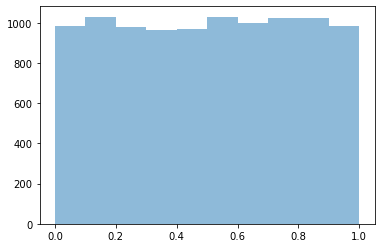

In [6]:
plt.hist(pvalues_1, alpha = 0.5)
plt.show()

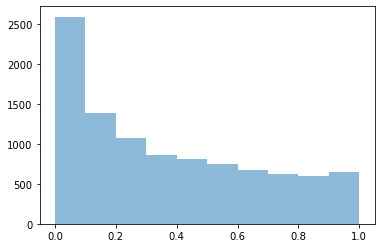

In [7]:
plt.hist(pvalues_2, alpha = 0.5)
plt.show()

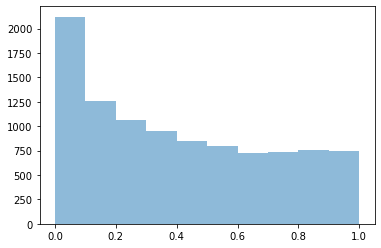

In [8]:
plt.hist(pvalues_3, alpha = 0.5)
plt.show()

### 2. Генерируйте выборки объема 𝑛 = 50 из 𝒩(0,1) (первую) и 𝒩(0,1) (вторую). Проверьте их од- нородность критерием Баумгартнера–Вейсса–Шиндлера. Теперь то же для выборок из 𝒩(0,1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую).

In [9]:
def get_ranks(merged_lst, lst):
    indices = []
    
    for i in range(len(merged_lst)):
        if merged_lst[i] in lst:
            indices.append(i)
            
    return indices

In [10]:
def get_B(sample1, sample2):
    merged_sample = []
    
    # Смешиваем выборку
    for element in sample1:
        merged_sample.append(element)
        
    for element in sample2:
        merged_sample.append(element)
    
    # Делаем вариационный ряд (сортируем)
    merged_sample.sort()
    
    # Получаем ранги (индексы вхождения элементов первой выборки в общей и наоборот)
    R = get_ranks(merged_sample, sample2)  # индексы второй выборки
    S = get_ranks(merged_sample, sample1)  # индексы первой выборки
    
    n = len(sample1)
    m = len(sample2)

    i = list(range(1, n + 1))
    j = list(range(1, m + 1))

    Bx = 1/n * np.sum((np.power(S - (n+m)*np.arange(1, n+1)/n, 2))/(np.arange(1, n+1)/(n+1) * (1 - np.arange(1, n+1)/(n+1)) * m*(n+m)/n))
    By = 1/m * np.sum((np.power(R - (n+m)*np.arange(1, m+1)/m, 2))/(np.arange(1, m+1)/(m+1) * (1 - np.arange(1, m+1)/(m+1)) * n*(n+m)/m))

    B = (Bx + By)/2
    
    return B

In [11]:
# Видно, что при одинаковых распределениях маленький B, при разных больше

norm1 = np.random.normal(0, 1, 50)
norm2 = np.random.normal(0, 1, 50)
unif = np.random.uniform(1, 10, 50)

print(get_B(norm1, norm2))
print(get_B(norm1, unif))

1.0706171931515158
81.17755272992713


### 3) Генерируйте выборки объема 𝑛 = 50 из 𝒩 (0, 1) (первую) и 𝒩 (0, 1) (вторую). Проверьте их однород- ность критерием Колмогорова–Смирнова. Теперь то же для выборок из 𝒩 (0, 1) и 𝒩 (0.2, 2). Теперь то же для выборок из 𝑅[0, 1] (первую) и 𝑅[0, 1.1] (вторую)

In [12]:
# тут то же самое что и в задании 1, но решил что графики сюда не буду добавлять
# но делаются они аналогично

alpha = 0.05

x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(0, 1, 50)

x3 = np.random.normal(0.2, 2, 50)

x4 = np.random.uniform(0,1,50)
x5 = np.random.uniform(0,1.1,50)

p_value1 = ks_2samp(x1, x2)[1]
p_value2 = ks_2samp(x1, x3)[1]
p_value3 = ks_2samp(x4, x5)[1]

print(p_value1)
print(p_value2)
print(p_value3)

0.02170784069014051
0.039194586195352224
0.8692618870414056


### 4. Генерируйте пять выборок из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0, 1) объема 100. Исследуйте их на равенство средних методом Краскера–Уоллиса. Проделайте то же для пяти выборок, где первые четыре из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0,1), а пятая из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0.5,1). Теперь для пяти выборок из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(𝑖/10,1), 𝑖 = 1,...,5. И наконец, для пяти выборок, где первые четыре из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0, 1), а пятая из 𝐿𝑎𝑝𝑙𝑎𝑐𝑒(0.5, 2)

In [13]:
# Такое же задание как и 1, только проверяем множество выборок на однородность
# Соответственно с помощью другого критерия
# При желании можно и сделать графики p-value для наглядности

from scipy.stats import kruskal

x1 = np.random.laplace(0, 1, 100)
x2 = np.random.laplace(0, 1, 100)
x3 = np.random.laplace(0, 1, 100)
x4 = np.random.laplace(0, 1, 100)
x5 = np.random.laplace(0, 1, 100)

y1 = np.random.laplace(0.1, 1, 100)
y2 = np.random.laplace(0.2, 1, 100)
y3 = np.random.laplace(0.3, 1, 100)
y4 = np.random.laplace(0.4, 1, 100)
y5 = np.random.laplace(0.5, 1, 100)

x6 = np.random.laplace(0.5, 1, 100)
x7 = np.random.laplace(0.5, 2, 100)

p_value1 = kruskal(x1, x2, x3, x4, x5)[1]
print('1:', p_value1)
print()

p_value2 = kruskal(x1, x2, x3, x4, x6)[1]
print('2:', p_value2)
print()

p_value3 = kruskal(y1, y2, y3, y4, y5)[1]
print('3:', p_value3)
print()

p_value4 = kruskal(x1, x2, x3, x4, x7)[1]
print('4:', p_value4)

1: 0.3497145158005339

2: 0.019675859736575638

3: 0.2575046800366113

4: 0.16293875632047483


### 6. В файле Pottery.txt содержится информация о содержании химических элементов в изделиях трех различных культур. Исследовать выборки а) на однородность б) на равенство средних. Произвести покомпонентный визуальный анализ.

In [14]:
# сложный вариант

import pandas as pd

d = pd.read_csv("Pottery.txt", sep=" ")
d

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [15]:
import seaborn as sns

# Решейпим именно таким образом

d_melt = pd.melt(d, id_vars=['Site'], value_vars=['Al', 'Fe', 'Mg', 'Ca', 'Na'])
d_melt.columns = ['Site', 'element', 'value']
d_melt.head()

,Site,element,value
0,Llanedyrn,Al,14.4
1,Llanedyrn,Al,13.8
2,Llanedyrn,Al,14.6
3,Llanedyrn,Al,11.5
4,Llanedyrn,Al,13.8


<AxesSubplot:xlabel='Site', ylabel='value'>

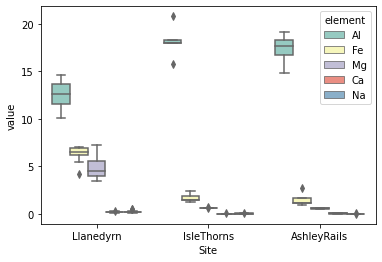

In [16]:
# сгенерировать коробочную диаграмму, чтобы увидеть распределение данных по культурам и элементам. 

sns.boxplot(x="Site", y="value", hue="element", data=d_melt, palette="Set3")

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(Site) + C(element) + C(Site):C(element)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Site),20.453021,2.0,14.339403,3.119996e-06
C(element),3465.709078,4.0,1214.886458,6.280706e-87
C(Site):C(element),373.178442,8.0,65.407890,2.555812e-37
Residual,74.883429,105.0,NaN,NaN


In [18]:
from bioinfokit.analys import stat 

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=d_melt, res_var='value', anova_model='value~C(Site)+C(element)+C(Site):C(element)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Site),2.0,20.453021,10.226511,14.339403,3.119996e-06
C(element),4.0,3465.709078,866.427270,1214.886458,6.280706e-87
C(Site):C(element),8.0,373.178442,46.647305,65.407890,2.555812e-37
Residual,105.0,74.883429,0.713176,NaN,NaN


Значение p, полученное в результате анализа ANOVA для культуры, элемнтов и взаимодействия, статистически значимо (p<0,05). Мы пришли к выводу, что тип кульуры значительно влияет на количество содержания в нём того или иного элемента.

Поскольку взаимодействие значимо, давайте визуализируем график взаимодействия (также называемый графиком профиля)

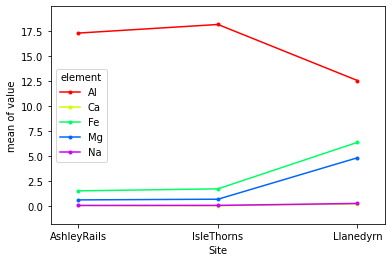

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=d_melt['Site'], trace=d_melt['element'], response=d_melt['value'])
plt.show()

In [20]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Site', anova_model='value~C(Site)+C(element)+C(Site):C(element)')
res.tukey_summary

/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Llanedyrn,IsleThorns,0.713943,0.246132,1.181754,5.131419,0.001276
1,Llanedyrn,AshleyRails,0.935543,0.467732,1.403354,6.724155,0.001000
2,IsleThorns,AshleyRails,0.221600,-0.346301,0.789501,1.312023,0.614475


### 7. В файле Memory.txt содержится информация об исследовании памяти у молодых и пожилых лю- дей. Каждому участнику давали одно из пяти упражнений: а) Counting – подсчитать число букв в каждом из слов б) Rhyming – придумать рифму к каждому из слов в) Adjective – подобрать прилагательное к каждому слову г) Imagery – представить изображение предмета д) Intentional – запомнить слова. После 27 таких слов участников попросили вспомнить слова. В таблице при- ведено количество успехов в каждом из испытаний. Проверить гипотезу о том, что а) возраст б) вид упражнения не влияет на успешность прохождения теста. Построить boxplot для визуальной проверки.

In [21]:
younger = []
older = []

with open("Memory.txt") as file:
    first_row = file.readline()
    for line in file:
        temp = line.split()
        print(temp)
        
        if temp[0] == "Younger":
            younger.append(float(temp[2]))
        else:
            older.append(float(temp[2]))

['Younger', 'Counting', '8.0']
['Younger', 'Counting', '6.0']
['Younger', 'Counting', '4.0']
['Younger', 'Counting', '6.0']
['Younger', 'Counting', '7.0']
['Younger', 'Counting', '6.0']
['Younger', 'Counting', '5.0']
['Younger', 'Counting', '7.0']
['Younger', 'Counting', '9.0']
['Younger', 'Counting', '7.0']
['Younger', 'Rhyming', '10.0']
['Younger', 'Rhyming', '7.0']
['Younger', 'Rhyming', '8.0']
['Younger', 'Rhyming', '10.0']
['Younger', 'Rhyming', '4.0']
['Younger', 'Rhyming', '7.0']
['Younger', 'Rhyming', '10.0']
['Younger', 'Rhyming', '6.0']
['Younger', 'Rhyming', '7.0']
['Younger', 'Rhyming', '7.0']
['Younger', 'Adjective', '14.0']
['Younger', 'Adjective', '11.0']
['Younger', 'Adjective', '18.0']
['Younger', 'Adjective', '14.0']
['Younger', 'Adjective', '13.0']
['Younger', 'Adjective', '22.0']
['Younger', 'Adjective', '17.0']
['Younger', 'Adjective', '16.0']
['Younger', 'Adjective', '12.0']
['Younger', 'Adjective', '11.0']
['Younger', 'Imagery', '20.0']
['Younger', 'Imagery', '16

In [29]:
# Проверим выборки на однородность

alpha = 0.05

pvalue = ks_2samp(younger, older, alternative='greater')[1]

if pvalue > alpha:
    print("Выборки однороды => возраст не влияет")
    print(f"{pvalue} > {alpha}")
else:
    print("Выборки неоднородны => возраст влияет")
    print(f"{pvalue} < {alpha}")

Выборки однороды => возраст не влияет
0.9803921568627451 > 0.05


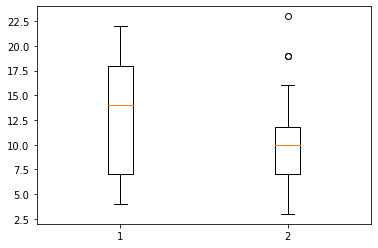

In [23]:
data1 = [younger, older]
plt.boxplot(data1)
plt.show()

In [24]:
counting = []
rhyming = []
adjective = []
imagery = []
intentional = []

with open("Memory.txt") as file:
    first_row = file.readline()
    for line in file:
        temp = line.split()
        
        if temp[1] == "Counting":
            counting.append(float(temp[2]))
        elif temp[1] == "Rhyming":
            rhyming.append(float(temp[2]))
        elif temp[1] == "Adjective":
            adjective.append(float(temp[2]))
        elif temp[1] == "Imagery":
            imagery.append(float(temp[2]))
        else:
            intentional.append(float(temp[2]))

In [25]:
pvalue = anderson_ksamp([counting, rhyming, adjective, imagery, intentional])[2]

if pvalue > alpha:
    print("Выборки однородны => задание не влияет")
    print(f"{pvalue} > {alpha}")
else:
    print("Выборки не однородны => задание влияет")
    print(f"{pvalue} < {alpha}")

Выборки не однородны => задание влияет
0.001 < 0.05


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/1462237917.py:1: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([counting, rhyming, adjective, imagery, intentional])[2]


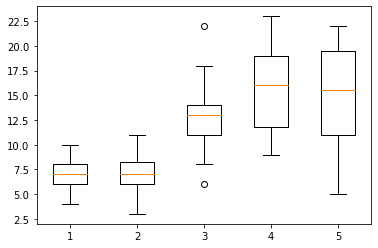

In [26]:
data2 = [counting, rhyming, adjective, imagery, intentional]
plt.boxplot(data2)
plt.show()

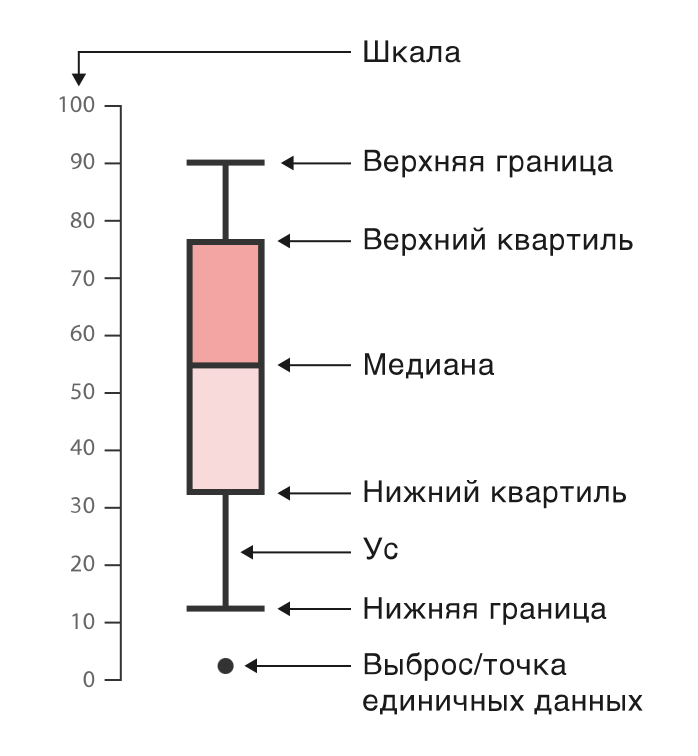

### 6. В файле Pottery.txt содержится информация о содержании химических элементов в изделиях трех различных культур. Исследовать выборки а) на однородность б) на равенство средних. Произвести покомпонентный визуальный анализ.

Выборки не однородны => содержание Al зависит от культуры
0.001 < 0.05


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/2456089406.py:24: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]


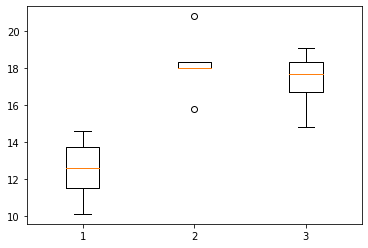

Выборки не однородны => содержание Fe зависит от культуры
0.001 < 0.05


/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/2456089406.py:24: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]


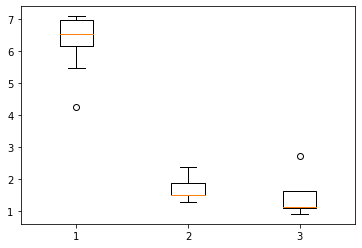

/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/2456089406.py:24: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]


Выборки не однородны => содержание Mg зависит от культуры
0.001 < 0.05


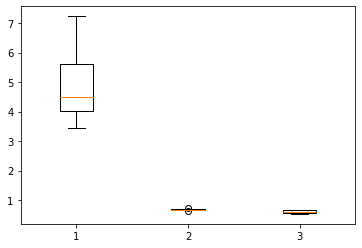

/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/2456089406.py:24: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]


Выборки не однородны => содержание Ca зависит от культуры
0.001 < 0.05


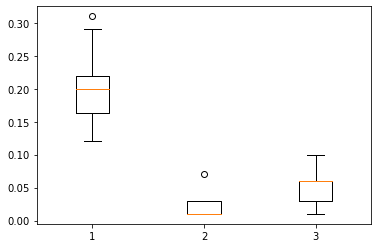

/var/folders/sv/b5zr3x594nqfqz1f1_pgq6f00000gn/T/ipykernel_74501/2456089406.py:24: UserWarning: p-value floored: true value smaller than 0.001
  pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]


Выборки не однородны => содержание Na зависит от культуры
0.001 < 0.05


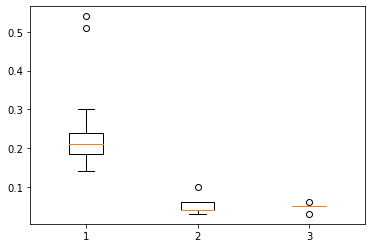

In [31]:
# проверка на однородность + boxplot

words = ['Al', 'Fe', 'Mg', 'Ca', 'Na']

for i in range(5):
    
    Llanedyrn = []
    IsleThorns = []
    AshleyRails = []

    with open("Pottery.txt") as file:
        first_row = file.readline()

        for line in file:
            temp = line.split()

            if temp[0] == '"Llanedyrn"':
                Llanedyrn.append(float(temp[i + 1]))
            elif temp[0] == '"IsleThorns"':
                IsleThorns.append(float(temp[i + 1]))
            else:
                AshleyRails.append(float(temp[i + 1]))

    pvalue = anderson_ksamp([Llanedyrn, IsleThorns, AshleyRails])[2]

    if pvalue > alpha:
        print(f"Выборки однородны => содержание {words[i]} не зависит от культуры")
        print(f"{pvalue} > {alpha}")
    else:
        print(f"Выборки не однородны => содержание {words[i]} зависит от культуры")
        print(f"{pvalue} < {alpha}")

    data = [Llanedyrn, IsleThorns, AshleyRails]
    plt.boxplot(data)
    plt.show()

In [28]:
# проверка на равенство средних + можно увидеть на boxplotах

words = ['Al', 'Fe', 'Mg', 'Ca', 'Na']

for i in range(5):
    
    Llanedyrn = []
    IsleThorns = []
    AshleyRails = []

    with open("Pottery.txt") as file:
        first_row = file.readline()

        for line in file:
            temp = line.split()

            if temp[0] == '"Llanedyrn"':
                Llanedyrn.append(float(temp[i + 1]))
            elif temp[0] == '"IsleThorns"':
                IsleThorns.append(float(temp[i + 1]))
            else:
                AshleyRails.append(float(temp[i + 1]))
                
    res1 = ttest_ind(Llanedyrn, IsleThorns)[1]
    res2 = ttest_ind(Llanedyrn, AshleyRails)[1]
    res3 = ttest_ind(IsleThorns, AshleyRails)[1]
    
    print(f"Для {words[i]}")
    
    print(f"Для Llanedyrn и IsleThorns")
    if res1 > alpha:
        print(f"Выборки однородны")
        print(f"{res1} > {alpha}")
    else:
        print(f"Выборки НЕ однородны") 
        print(f"{res1} < {alpha}")
        
    print()
    
    print(f"Для Llanedyrn и AshleyRails")
    if res2 > alpha:
        print(f"Выборки однородны")
        print(f"{res2} > {alpha}")
    else:
        print(f"Выборки НЕ однородны") 
        print(f"{res2} < {alpha}")
        
    print()
    
    print(f"Для IsleThorns и AshleyRails")
    if res3 > alpha:
        print(f"Выборки однородны")
        print(f"{res3} > {alpha}")
    else:
        print(f"Выборки НЕ однородны") 
        print(f"{res3} < {alpha}")
        
    print()

Для Al
Для Llanedyrn и IsleThorns
Выборки НЕ однородны
1.2841293200443665e-06 < 0.05

Для Llanedyrn и AshleyRails
Выборки НЕ однородны
7.947340770596518e-06 < 0.05

Для IsleThorns и AshleyRails
Выборки однородны
0.45152018631860136 > 0.05

Для Fe
Для Llanedyrn и IsleThorns
Выборки НЕ однородны
5.755984423221524e-10 < 0.05

Для Llanedyrn и AshleyRails
Выборки НЕ однородны
9.446533532571065e-10 < 0.05

Для IsleThorns и AshleyRails
Выборки однородны
0.6152903143601238 > 0.05

Для Mg
Для Llanedyrn и IsleThorns
Выборки НЕ однородны
1.9474297388248876e-07 < 0.05

Для Llanedyrn и AshleyRails
Выборки НЕ однородны
1.5624222508012908e-07 < 0.05

Для IsleThorns и AshleyRails
Выборки однородны
0.06502284140230587 > 0.05

Для Ca
Для Llanedyrn и IsleThorns
Выборки НЕ однородны
6.025350495377847e-06 < 0.05

Для Llanedyrn и AshleyRails
Выборки НЕ однородны
4.951809486880811e-05 < 0.05

Для IsleThorns и AshleyRails
Выборки однородны
0.2134526074223702 > 0.05

Для Na
Для Llanedyrn и IsleThorns
Выборки Н

In [33]:
mg = []
fe = []

with open("Pottery.txt") as file:
        first_row = file.readline()

        for line in file:
            temp = line.split()
            
            fe.append(float(temp[2]))
            mg.append(float(temp[3]))
            
res4 = ttest_ind(fe, mg)[1]
print(res4)

0.06362256875588683


In [54]:
dem = []
resp = []

beg = []
star = []

near = []
far = []

with open('impeach.txt') as file:
    for line in file:
        temp = line.split()
        
        if temp[5] == '0':
            dem.append(float(temp[4]))
        else:
            resp.append(float(temp[4]))
            
        if temp[9] == '1':
            beg.append(float(temp[4]))
        else:
            star.append(float(temp[4]))
            
        if float(temp[7]) > 50:
            near.append(float(temp[4]))
        else:
            far.append(float(temp[4]))

In [38]:
res1 = ttest_ind(dem, resp)[1]
print(res1)

res2 = ttest_ind(beg, star)[1]
print(res2)

res3 = ttest_ind(near, far)[1]
print(res3)

6.341318150874907e-34
0.06053719120094552
1.4872359585613473e-07


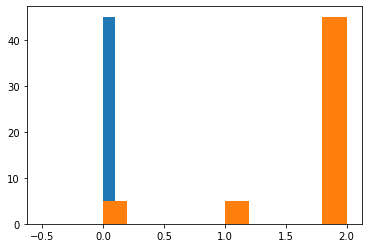

In [42]:
plt.hist(dem)
plt.hist(resp)
plt.show()

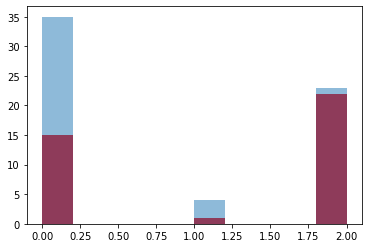

In [50]:
plt.hist(beg, color='red')
plt.hist(star, alpha=0.5)
plt.show()

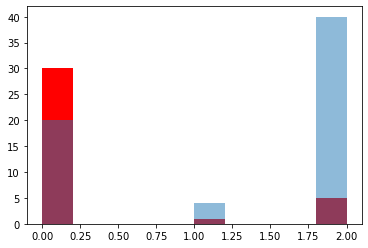

In [53]:
plt.hist(near, color='red')
plt.hist(far, alpha=0.5)
plt.show()